
<img src="img/viu_logo.png" width="200">

## 01MIAR - Pandas

![logo](img/python_logo.png)

*Ivan Fuertes*

*Benjamin Arroquia Cuadros*

# Pandas
- Librería (de facto estándar) para estructurar datos tabulares
- Multivariable (string, int, float, bool...)
- Dos clases:
  - Series (1 dimensión)
  - DataFrames (2+ dimensiones)

In [1]:
# librería externa
import pandas as pd
import numpy as np
# from pandas import Series, DataFrame

# Series
- Datos unidimensionales (similar a NumPy)
- Elementos + índices modificables
- Índices semánticos y posicionales

In [2]:
countries = pd.Series(['Spain','Andorra','Gibraltar','Portugal','France']) # le pasamos una lista
print(type(countries))
print(countries)
print(countries.index)
print(countries.values)

<class 'pandas.core.series.Series'>
0        Spain
1      Andorra
2    Gibraltar
3     Portugal
4       France
dtype: object
RangeIndex(start=0, stop=5, step=1)
['Spain' 'Andorra' 'Gibraltar' 'Portugal' 'France']


In [3]:
# especificando el índice
countries = pd.Series(['Spain','Andorra','Gibraltar','Portugal','France'],
                       index=range(10,60,10))
print(countries)

10        Spain
20      Andorra
30    Gibraltar
40     Portugal
50       France
dtype: object


In [4]:
football_cities = pd.Series(list(range(0, 4)), 
                            index=['a','b','c','d'])
football_cities

a    0
b    1
c    2
d    3
dtype: int64

In [5]:
# los índices pueden ser de más tipos
# los índices semánticos pueden repetirse
football_cities = pd.Series(['Barcelona','Madrid','Valencia','Sevilla'], 
                            index=['a','b','c','d'])
print(football_cities)

a    Barcelona
b       Madrid
c     Valencia
d      Sevilla
dtype: object


In [6]:
# Atributos
football_cities.name = 'Ciudades con dos equipos en primera' # nombrar la Serie
football_cities.index.name = 'asdasdasd' # Describir los índices
print(football_cities)

asdasdasd
a    Barcelona
b       Madrid
c     Valencia
d      Sevilla
Name: Ciudades con dos equipos en primera, dtype: object


In [7]:
# Acceso a los índices
football_cities.index, football_cities.name

(Index(['a', 'b', 'c', 'd'], dtype='object', name='asdasdasd'),
 'Ciudades con dos equipos en primera')

In [8]:
# acceso similar a NumPy o listas, según posición
print(football_cities[2])

# acceso a través del índice semántico
print(football_cities['c'])

print(football_cities['c'] == football_cities[2])

Valencia
Valencia
True


# Tratamiento similar a ndarray

In [9]:
# múltiple recolección de elementos
print(football_cities[ ['a','c'] ])
print(football_cities[ [0, 3] ])

asdasdasd
a    Barcelona
c     Valencia
Name: Ciudades con dos equipos en primera, dtype: object
asdasdasd
a    Barcelona
d      Sevilla
Name: Ciudades con dos equipos en primera, dtype: object


In [10]:
# slicing
print(football_cities[:'c']) # incluye ambos extremos con el indice semantico
print(football_cities[:2])

asdasdasd
a    Barcelona
b       Madrid
c     Valencia
Name: Ciudades con dos equipos en primera, dtype: object
asdasdasd
a    Barcelona
b       Madrid
Name: Ciudades con dos equipos en primera, dtype: object


In [11]:
#cast a list
lista = list(football_cities[:'c'])
print(lista)

['Barcelona', 'Madrid', 'Valencia']


In [12]:
type(football_cities[:'c'])

pandas.core.series.Series

In [13]:
#cast a ndarray
import numpy as np

cities = np.array(football_cities[:'c'])
print(cities)
print(type(cities))

['Barcelona' 'Madrid' 'Valencia']
<class 'numpy.ndarray'>


In [14]:
# uso de masks para seleccionar
fibonacci = pd.Series([0, 1, 1, 2, 3, 5, 8, 13, 21])

mask = fibonacci > 10
print(mask)
print(fibonacci[mask])

dst = pd.Series([13,21])
print(dst)

fb = fibonacci[mask]
fb.reset_index(drop=True, inplace=True) # reinicia los indices, inplace=True no genera otra serie si no ataca la original
print(fb)

# Comparación de dos series tienen los mimos elementos
dst.equals(fb) # deben ser iguales valores e indices para True

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8     True
dtype: bool
7    13
8    21
dtype: int64
0    13
1    21
dtype: int64
0    13
1    21
dtype: int64


True

In [15]:
# aplicar funciones de numpy a la serie
np.sum(fibonacci)
fibonacci.sum() # lo mas comodo

54

In [16]:
#filtrado con np.where
distances = pd.Series([12.1,np.nan,12.8,76.9,6.1,7.2])

valid_distances = np.where(pd.notnull(distances),distances,0) # imprime todos los elementos no nulos y ponle 0 a los nulos

print(valid_distances)
print(type(valid_distances))

[12.1  0.  12.8 76.9  6.1  7.2]
<class 'numpy.ndarray'>


### Iteración

In [17]:
# iterar sobre elementos
for value in fibonacci:
    print('Value: ' + str(value))

# iterar sobre indices
for index in fibonacci.index:
    print('Index: ' + str(index))

Value: 0
Value: 1
Value: 1
Value: 2
Value: 3
Value: 5
Value: 8
Value: 13
Value: 21
Index: 0
Index: 1
Index: 2
Index: 3
Index: 4
Index: 5
Index: 6
Index: 7
Index: 8


In [18]:
# iterar sobre elementos e índices al mismo tiempo
for index, value in fibonacci.items():
    print('Index: ' + str(index) + '  Value: ' + str(value))

Index: 0  Value: 0
Index: 1  Value: 1
Index: 2  Value: 1
Index: 3  Value: 2
Index: 4  Value: 3
Index: 5  Value: 5
Index: 6  Value: 8
Index: 7  Value: 13
Index: 8  Value: 21


In [19]:
for index, value in zip(fibonacci.index, fibonacci):
    print('Index: ' + str(index) + '  Value: ' + str(value))  

Index: 0  Value: 0
Index: 1  Value: 1
Index: 2  Value: 1
Index: 3  Value: 2
Index: 4  Value: 3
Index: 5  Value: 5
Index: 6  Value: 8
Index: 7  Value: 13
Index: 8  Value: 21


## Series como diccionarios
- Interpretar el índice como clave
- Acepta operaciones para diccionarios

In [20]:
# crear una serie a partir de un diccionario
serie = pd.Series( { 'Carlos' : 100, 'Marcos': 98} )

print(serie.index)
print(serie.values)

print(serie)
print(type(serie))

Index(['Carlos', 'Marcos'], dtype='object')
[100  98]
Carlos    100
Marcos     98
dtype: int64
<class 'pandas.core.series.Series'>


In [21]:
# añade y elimina elementos a través de índices
serie['Pedro'] = 12
del serie['Marcos']
print(serie)

Carlos    100
Pedro      12
dtype: int64


In [22]:
# query una serie
# print(serie['Marcos'])

if 'Marcos' in serie:
    print(serie['Marcos'])
    
print(serie)

Carlos    100
Pedro      12
dtype: int64


## Operaciones entre series

In [23]:
# suma de dos series
# suma de valores con el mismo índice (NaN si no aparece en ambas)
serie1 = pd.Series([10, 20, 30, 40], index=range(4))
serie2 = pd.Series([10, 40, 20], index=range(0,3))
print(serie1 + serie2)
# No vale en comparaciones

#TODO: 
serie1.equals(serie2) # Si son de distinto tamaño la comparacion < y > no se puede hacer

0    20.0
1    60.0
2    50.0
3     NaN
dtype: float64


False

In [24]:
# resta de series (similar a la suma)
print(serie1 - serie2)

0     0.0
1   -20.0
2    10.0
3     NaN
dtype: float64


In [25]:
# operaciones de pre-filtrado
result = serie1 + serie2
result[pd.isnull(result)] = 0 # mask con isnull()
print(result)

0    20.0
1    60.0
2    50.0
3     0.0
dtype: float64


###  Diferencias entre Pandas Series y diccionario
* Diccionario, es una estructura que relaciona las claves y los valores de forma arbitraria.
* Series, estructura de forma estricta listas de valores con listas de índice asignado en la posición.
* Series, es más eficiente para ciertas operaciones que los dicionarios.
* En las Series los valores de entrada pueden ser listas o Numpy arrays.
* En Series los índices semánticos pueden ser integers o caracteres, en los valores igual.
* Series se podría entender entre una lista y un diccionario Python, pero es de una dimensión.

# DataFrame
- Datos tabulares (filas x columnas)
- Columnas: Series con índices compartidos

In [26]:
# crear un DataFrame a partir de un diccionario de elementos de la misma longitud
diccionario = { "Nombre" : ["Marisa","Laura","Manuel"], 
                "Edad" : [34,29,12] }

# las claves identifican columnas
frame = pd.DataFrame(diccionario) # camel case primeras letras de cada palabra en mayuscula
display(frame)
display(frame.index)
# frame.set_index(keys="Nombre", inplace=True)
# frame

,Nombre,Edad
0,Marisa,34
1,Laura,29
2,Manuel,12


RangeIndex(start=0, stop=3, step=1)

In [27]:
# crear un DataFrame a partir de un diccionario de elementos de la misma longitud
diccionario = { "Nombre" : ["Marisa","Laura","Manuel"], 
                "Edad" : [34,29,12] }

# las claves identifican columnas
frame = pd.DataFrame(diccionario, index=['a', 'b', 'c'])
display(frame)

,Nombre,Edad
a,Marisa,34
b,Laura,29
c,Manuel,12


In [28]:
# además de 'index', el parámetro 'columns' especifica el número y orden de las columnas
frame = pd.DataFrame(diccionario, columns=['Nacionalidad', 'Nombre', 'Profesion', 'Edad'])
display(frame) # display muestra una tabla mejor vista
print(frame.to_latex()) # formato de archivos se asemeja a csv

,Nacionalidad,Nombre,Profesion,Edad
0,NaN,Marisa,NaN,34
1,NaN,Laura,NaN,29
2,NaN,Manuel,NaN,12


\begin{tabular}{llllr}
\toprule
{} & Nacionalidad &  Nombre & Profesion &  Edad \\
\midrule
0 &          NaN &  Marisa &       NaN &    34 \\
1 &          NaN &   Laura &       NaN &    29 \\
2 &          NaN &  Manuel &       NaN &    12 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_158681/65805689.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(frame.to_latex()) # formato de archivos se asemeja a csv


In [29]:
columna_selecionada = "Edad"
# acceso a columnas
nombres = frame[columna_selecionada]
print(nombres) # retorna una serie
type(nombres)

0    34
1    29
2    12
Name: Edad, dtype: int64


pandas.core.series.Series

In [30]:
#siempre que el nombre de la columna lo permita (espacios, ...)
nombres = frame.Nombre # No utilizad valores definidos mejor utulizar variables frame[campo_buscar]
display(nombres)
type(nombres)

0    Marisa
1     Laura
2    Manuel
Name: Nombre, dtype: object

pandas.core.series.Series

In [31]:
# acceso al primer nombre del DataFrame frame??
print(frame['Nombre'][0]) # selecciono el campo y la primera fila, mas utilizado con variable
print(frame.Nombre[0])

Marisa
Marisa


### Formas de crear un DataFrame
* Con una Serie de pandas
* Lista de diccionarios
* Dicionario de Series de Pandas
* Con un array de Numpy de dos dimensiones
* Con array estructurado de Numpy 

## Modificar DataFrames

In [32]:
# añadir columnas
diccionario = { "Nombre" : ["Marisa","Laura","Manuel"], 
                "Edad" : [34,29,12] }

frame = pd.DataFrame(diccionario,columns=['Nacionalidad', 'Nombre', 'Edad', 'Profesion']) # DataFrame con 4 columnas
frame['Direccion'] = np.nan
display(frame)
frame.loc[:, ['Nombre', 'Edad', 'Direccion', 'Profesion']] # vista personalizada de la tabla

,Nacionalidad,Nombre,Edad,Profesion,Direccion
0,NaN,Marisa,34,NaN,NaN
1,NaN,Laura,29,NaN,NaN
2,NaN,Manuel,12,NaN,NaN


,Nombre,Edad,Direccion,Profesion
0,Marisa,34,NaN,NaN
1,Laura,29,NaN,NaN
2,Manuel,12,NaN,NaN


In [33]:
lista_direcciones = ['Rue 13 del Percebé, 13', 'Evergreen Térrace, 3', 'Av de los Rombos, 12']

In [34]:
frame['Direccion'] = lista_direcciones

display(frame)

,Nacionalidad,Nombre,Edad,Profesion,Direccion
0,NaN,Marisa,34,NaN,"Rue 13 del Percebé, 13"
1,NaN,Laura,29,NaN,"Evergreen Térrace, 3"
2,NaN,Manuel,12,NaN,"Av de los Rombos, 12"


In [35]:
# añadir fila (requiere todos los valores)
user_2 = ['Alemania','Klaus',20, 'none', 'Desconocida']
frame.loc[100] = user_2
display(frame)

,Nacionalidad,Nombre,Edad,Profesion,Direccion
0,NaN,Marisa,34,NaN,"Rue 13 del Percebé, 13"
1,NaN,Laura,29,NaN,"Evergreen Térrace, 3"
2,NaN,Manuel,12,NaN,"Av de los Rombos, 12"
100,Alemania,Klaus,20,none,Desconocida


In [36]:
# eliminar fila (similar a Series)
frame = pd.DataFrame(diccionario,columns=['Nacionalidad', 'Nombre', 'Edad', 'Profesion'])

frame.drop(2, inplace=True) # elimina una fila, por qué necesitamos reasignar el frame?
display(frame)

# En columnas hay que definir el nombre no la posición, axis=1
frame.drop(0, axis=0, inplace=True)
# frame.drop("Nacionalidad", axis=1, inplace=True) # para eliminar columnas se utiliza nombres de columnas
# Múltiples elementos con lista
# frame.drop([1, 2], axis=0, inplace=True)

display(frame)

,Nacionalidad,Nombre,Edad,Profesion
0,NaN,Marisa,34,NaN
1,NaN,Laura,29,NaN


,Nacionalidad,Nombre,Edad,Profesion
1,NaN,Laura,29,NaN


In [37]:
# eliminar columna
del frame['Profesion']
display(frame)

,Nacionalidad,Nombre,Edad
1,NaN,Laura,29


In [38]:
# acceder a la traspuesta (como una matriz)
display(frame.T)

,1
Nacionalidad,NaN
Nombre,Laura
Edad,29


## Exploración inicial de datos

In [39]:
# añadir columnas
diccionario = { "Nombre" : ["Marisa","Laura","Manuel", "Paco"], 
                "Edad" : [34,29,12, 22],
                "Direccion": ['Rue 13 del Percebe, 13', 'Evergreen Terrace, 3', 'Av de los Rombos, 12', 'Calle de la piruleta'],
                "Nacimiento" : ["11/02/2000", "11/04/1880", "11/07/2010", "11/12/1900"]
            }

df = pd.DataFrame(diccionario)

In [40]:
df.head(10) # si hay 1000 datos se puede traer los 10 primeras filas, en lugar de diplay(frame)

,Nombre,Edad,Direccion,Nacimiento
0,Marisa,34,"Rue 13 del Percebe, 13",11/02/2000
1,Laura,29,"Evergreen Terrace, 3",11/04/1880
2,Manuel,12,"Av de los Rombos, 12",11/07/2010
3,Paco,22,Calle de la piruleta,11/12/1900


In [41]:
df.tail(1) # trae el ultimo valor
df.sample(2) # trae una fila aleatoria

,Nombre,Edad,Direccion,Nacimiento
3,Paco,22,Calle de la piruleta,11/12/1900
0,Marisa,34,"Rue 13 del Percebe, 13",11/02/2000


In [42]:
# parámetros para ver todos los datos: include='all'
type(df.describe(include='all'))
df.describe(include='all')

,Nombre,Edad,Direccion,Nacimiento
count,4,4.000000,4,4
unique,4,NaN,4,4
top,Marisa,NaN,"Rue 13 del Percebe, 13",11/02/2000
freq,1,NaN,1,1
mean,NaN,24.250000,NaN,NaN
std,NaN,9.535023,NaN,NaN
min,NaN,12.000000,NaN,NaN
25%,NaN,19.500000,NaN,NaN
50%,NaN,25.500000,NaN,NaN
75%,NaN,30.250000,NaN,NaN


In [43]:
# tipo de datos del df
df.dtypes

Nombre        object
Edad           int64
Direccion     object
Nacimiento    object
dtype: object

In [44]:
# Tamaño del df
df.shape

(4, 4)

<AxesSubplot:>

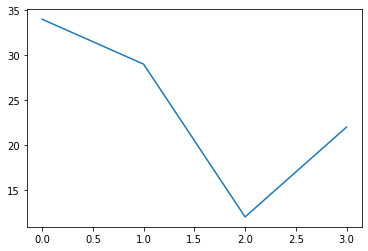

In [45]:
df["Edad"].plot()

## Iteración

In [46]:
# iteración sobre el DataFrame?
frame = pd.DataFrame(diccionario, columns=['Nacionalidad', 'Nombre', 'Edad', 'Profesion'])

for a in frame:
    print(a) # qué es 'a'?
    print(type(a))

Nacionalidad
<class 'str'>
Nombre
<class 'str'>
Edad
<class 'str'>
Profesion
<class 'str'>


In [47]:
# iteracion sobre filas
for value in frame.values:
    print(value)
    print(type(value))

[nan 'Marisa' 34 nan]
<class 'numpy.ndarray'>
[nan 'Laura' 29 nan]
<class 'numpy.ndarray'>
[nan 'Manuel' 12 nan]
<class 'numpy.ndarray'>
[nan 'Paco' 22 nan]
<class 'numpy.ndarray'>


In [48]:
# iterar sobre filas y luego sobre cada valor?
for values in frame.values:
    for value in values: 
        print(value)

nan
Marisa
34
nan
nan
Laura
29
nan
nan
Manuel
12
nan
nan
Paco
22
nan


## Indexación y slicing con DataFrames

In [49]:
d1 = {'ciudad':'Valencia', 'temperatura':10, 'o2':1}
d2 = {'ciudad':'Barcelona', 'temperatura':8}
d3 = {'ciudad':'Valencia', 'temperatura':9}
d4 = {'ciudad':'Madrid', 'temperatura':10, 'humedad':80}
d5 = {'ciudad':'Sevilla', 'temperatura':15, 'humedad':50, 'co2':6}
d6 = {'ciudad':'Valencia', 'temperatura':10, 'humedad':90, 'co2':10}

ls_data = [d1, d2, d3, d4, d5, d6]  # lista de diccionarios
df_data = pd.DataFrame(ls_data, index=list('abcdef'))
display(df_data)

,ciudad,temperatura,o2,humedad,co2
a,Valencia,10,1.0,NaN,NaN
b,Barcelona,8,NaN,NaN,NaN
c,Valencia,9,NaN,NaN,NaN
d,Madrid,10,NaN,80.0,NaN
e,Sevilla,15,NaN,50.0,6.0
f,Valencia,10,NaN,90.0,10.0


In [50]:
# # Acceso a un valor concreto por indice posicional [row, col]
# print(df_data.iloc[1,1]) # acceso posicional, valor en la fila 1 y columna 1

# # Acceso a todos los valores hasta un índice por enteros
# display(df_data.iloc[:3,:4])

# Acceso a datos de manera explícita, indice semantico (se incluyen)
display(df_data.loc['d', 'temperatura'])
display(df_data.loc[:'c', :'o2'])
display(df_data.loc[:'c', 'temperatura':'o2'])

ls_columnas = ['ciudad', 'temperatura']
col_ind = 'humedad'

display(df_data.loc[:, ls_columnas])

10

,ciudad,temperatura,o2
a,Valencia,10,1.0
b,Barcelona,8,NaN
c,Valencia,9,NaN


,temperatura,o2
a,10,1.0
b,8,NaN
c,9,NaN


,ciudad,temperatura
a,Valencia,10
b,Barcelona,8
c,Valencia,9
d,Madrid,10
e,Sevilla,15
f,Valencia,10


In [51]:
# df_data['temperatura'][0] # accede al campo temperatura y te da el primer valor
# df_data.loc[['a', 'c'], :]
df_data['temperatura']

a    10
b     8
c     9
d    10
e    15
f    10
Name: temperatura, dtype: int64

In [52]:
# indexación con nombre de columna (por columnas)
print(df_data['ciudad']) # --> Series

display(df_data.loc[:, ['ciudad', 'o2']])

a     Valencia
b    Barcelona
c     Valencia
d       Madrid
e      Sevilla
f     Valencia
Name: ciudad, dtype: object


,ciudad,o2
a,Valencia,1.0
b,Barcelona,NaN
c,Valencia,NaN
d,Madrid,NaN
e,Sevilla,NaN
f,Valencia,NaN


In [53]:
# indexación con índice posicional (no permitido!). Esto busca columna.
df_data[0]

KeyError: 0

In [ ]:
# indexar por posición con 'iloc'
print(df_data.iloc[0]) # --> Series de la primera fila (qué marca los índices)

ciudad         Valencia
temperatura          10
o2                  1.0
humedad             NaN
co2                 NaN
Name: a, dtype: object


In [ ]:
# indexar semántico con 'loc'
df_data.loc['a'] # --> Series de la fila con índice 'a'

ciudad         Valencia
temperatura          10
o2                  1.0
humedad             NaN
co2                 NaN
Name: a, dtype: object

In [ ]:
# indexar semántico con 'loc'
df_data.loc[:'b'] # --> DataFrame de la fila con índice 'a'

,ciudad,temperatura,o2,humedad,co2
a,Valencia,10,1.0,NaN,NaN
b,Barcelona,8,NaN,NaN,NaN


In [ ]:
type(serie)
serie

ciudad         Valencia
temperatura          10
o2                 3000
humedad             NaN
co2                 NaN
Name: a, dtype: object

In [ ]:
# si se modifica una porcion del dataframe se modifica el dataframe original (referencia)
serie = df_data.loc['a']
serie[2] = 3000

display(df_data)

# copiar data frame
# df_2 = df_data.copy()

/tmp/ipykernel_44865/2763499523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie[2] = 3000


,ciudad,temperatura,o2,humedad,co2
a,Valencia,10,1.0,NaN,NaN
b,Barcelona,8,NaN,NaN,NaN
c,Valencia,9,NaN,NaN,NaN
d,Madrid,10,NaN,80.0,NaN
e,Sevilla,15,NaN,50.0,6.0
f,Valencia,10,NaN,90.0,10.0


In [ ]:
# ambos aceptan 'axis' como argumento
df_data.iloc(axis=1)[0] # --> todos los valores asignados a la primera columna 'ciudad'
df_data.loc(axis=1)['ciudad'] # --> equivalente frame['ciudad']

a     Valencia
b    Barcelona
c     Valencia
d       Madrid
e      Sevilla
f     Valencia
Name: ciudad, dtype: object

In [ ]:
# qué problema puede tener este fragmento?
frame = pd.DataFrame({"Name" : ['Carlos','Pedro'], "Age" : [34,22]}, index=[1,0])
display(frame)

,Name,Age
1,Carlos,34
0,Pedro,22


In [ ]:
# por defecto, pandas interpreta índice posicional --> error en frames
# cuando hay posible ambigüedad, utilizar loc y iloc
print('Primera fila\n')
print(frame.iloc[0])
print('\nElemento con index 0\n')
print(frame.loc[0])

Primera fila

Name    Carlos
Age         34
Name: 1, dtype: object

Elemento con index 0

Name    Pedro
Age        22
Name: 0, dtype: object


## Objeto Index de Pandas

In [ ]:
# Contrucción de índices
ind = pd.Index([2, 3, 5, 23, 26])
# recuperar datos
print(ind[3])
print(ind[::2])

23
Index([2, 5, 26], dtype='int64')


In [ ]:
# usar un objeto index al crear dataframe
frame = pd.DataFrame({"Name" : ['Carlos','Pedro', 'Manolo', 'Luis', 'Alberto'], "Age" : [34,22,15,55,23]}, index=ind)
display(frame)

,Name,Age
2,Carlos,34
3,Pedro,22
5,Manolo,15
23,Luis,55
26,Alberto,23


In [ ]:
# Son inmutables! No se modifican los datos. 
ind[3] = 8

TypeError: Index does not support mutable operations

In [ ]:
# Definir una columna como indice
# frame.set_index(keys=["Name", "Age"], inplace=True)

frame.index # obj multiindex

MultiIndex([( 'Carlos', 34),
            (  'Pedro', 22),
            ( 'Manolo', 15),
            (   'Luis', 55),
            ('Alberto', 23)],
           names=['Name', 'Age'])

## Slicing

In [56]:
# slice por filas
d_and_d_characters = {'Name' : ['bundenth','theorin','barlok'], 'Strength' : [10,12,19], 'Wisdom' : [20,13,6]}
character_data = pd.DataFrame(d_and_d_characters, index=['a','b','c'])
display(character_data)
display(character_data[:-1])
display(character_data[1:2])

,Name,Strength,Wisdom
a,bundenth,10,20
b,theorin,12,13
c,barlok,19,6


,Name,Strength,Wisdom
a,bundenth,10,20
b,theorin,12,13


,Name,Strength,Wisdom
b,theorin,12,13


In [57]:
# slicing para columnas
display(character_data[['Name','Wisdom']])

,Name,Wisdom
a,bundenth,20
b,theorin,13
c,barlok,6


In [58]:
#slicing con 'loc' e 'iloc'
display(character_data.iloc[1:])
display(character_data.loc[:'b','Name':'Strength'])

,Name,Strength,Wisdom
b,theorin,12,13
c,barlok,19,6


,Name,Strength
a,bundenth,10
b,theorin,12


¿Cómo filtrar filas y columnas? Por ejemplo, para todos los personajes, obtener 'Name' y 'Strength'

In [59]:
# usando 'loc' para hacer slicing
display(character_data.loc[:,'Name':'Strength'])

,Name,Strength
a,bundenth,10
b,theorin,12
c,barlok,19


In [60]:
# usando 'loc' para buscar específicamente filas y columnas
display(character_data.loc[ ['a','c'], ['Name','Wisdom'] ])

,Name,Wisdom
a,bundenth,20
c,barlok,6


In [61]:
# lo mismo con 'iloc'?
display(character_data.iloc[[0,2],[0,2]])
display(character_data.iloc[[0,-1],[-1]])

,Name,Wisdom
a,bundenth,20
c,barlok,6


,Wisdom
a,20
c,6


In [62]:
character_data['Strength'] > 11
character_data

,Name,Strength,Wisdom
a,bundenth,10,20
b,theorin,12,13
c,barlok,19,6


In [63]:
# lista de los personajes con el atributo Strength > 11
display(character_data.loc[character_data['Strength'] == 10, ['Wisdom']])

,Wisdom
a,20


In [ ]:
# listar los personajes con Strength > 15 o Wisdom > 15
display(character_data.loc[(character_data['Strength'] > 5) & (character_data['Wisdom'] > 15)])

,Name,Strength,Wisdom
a,bundenth,10,20


In [64]:
# Comprobar si hay nulos
display(pd.isnull(character_data['Strength']))

d_and_d_characters = {'Name' : ['bundenth','theorin','barlok'], 
                      'Strength' : [10,12,19], 'Wisdom' : [20,None,np.nan]}
character_data = pd.DataFrame(d_and_d_characters, index=['a','b','c'])
character_data.head()

# pd.isnull(character_data['Wisdom']) # indica si en la columna hay nulos
display(character_data.loc[pd.isnull(character_data['Wisdom']), :]) # devuelve todas las filas que tienen nulo en la columna de Wisdom


a    False
b    False
c    False
Name: Strength, dtype: bool

,Name,Strength,Wisdom
b,theorin,12,NaN
c,barlok,19,NaN


# Cargar y guardar datos en pandas

In [66]:
character_data.reset_index(drop=False, inplace=True) #no quiero que me elimines y lo guardamos como una columna mas
character_data

,index,Name,Strength,Wisdom
0,a,bundenth,10,20.0
1,b,theorin,12,NaN
2,c,barlok,19,NaN


In [67]:
# Guardar a csv
import os
ruta = os.path.join("res" ,"o_d_d_characters.csv")

character_data.to_csv(ruta, sep=';', index=False) # sep por defecto: ',' index=False no guarda el indice de antes

In [68]:
loaded = pd.read_csv(ruta, sep=';')
display(loaded)

,index,Name,Strength,Wisdom
0,a,bundenth,10,20.0
1,b,theorin,12,NaN
2,c,barlok,19,NaN


In [69]:
loaded = pd.read_csv(ruta, sep=';', index_col=0)
display(loaded)

,Name,Strength,Wisdom
index,,,
a,bundenth,10,20.0
b,theorin,12,NaN
c,barlok,19,NaN


In [70]:
# Cargar n filas del csv, para ficheros con muchos datos
loaded = pd.read_csv(ruta, sep=';', index_col=0, nrows=1) # nrows te devuelve el numero de filas que le indiques
display(loaded)

,Name,Strength,Wisdom
index,,,
a,bundenth,10,20.0


#### otros argumentos to_csv()
- na_rep='string' --> representar valores NaN en el archivo csv

#### otros argumentos read_csv()
- na_values='string'


Pandas también ofrece funciones para leer/guardar a otros formatos estándares: JSON, HDF5 o Excel en su [API](https://pandas.pydata.org/pandas-docs/stable/reference/io.html)

# Ejemplo práctico en pandas
- [MovieLens dataset](https://grouplens.org/datasets/movielens/)
 - Reviews de películas
 - 1 millón de entradas
 - Datos demográficos de usuarios

In [71]:
import numpy as np
import pandas as pd
import zipfile # para descomprimir archivos zip
import urllib.request # para descargar de URL
import os

# descargar MovieLens dataset
url = 'http://files.grouplens.org/datasets/movielens/ml-1m.zip'  
ruta = os.path.join("tmp", "ml-1m.zip")
urllib.request.urlretrieve(url, ruta)

('tmp/ml-1m.zip', <http.client.HTTPMessage at 0x7ff7bb7c4bb0>)

In [76]:
# descomprimiendo archivo zip
ruta_ext = os.path.join("data")
with zipfile.ZipFile(ruta, 'r') as z: 
    print('Extracting all files...') 
    z.extractall(ruta_ext) # destino
    print('Done!') 
    
# take a look at readme y revisar formatos

Extracting all files...
Done!


In [78]:
ruta_users = os.path.join("tmp", "ml-1m", "users.dat")

users_dataset = pd.read_csv(ruta_users, sep='::', index_col=0, engine='python')
display(users_dataset)

,F,1.1,10,48067
1,,,,
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
6,F,50,9,55117
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706


In [79]:
# Varios problemas
# sin cabecera! primer valor se ha perdido
# las columnas no tienen nombres
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    sep=<no_default>,
    delimiter=None,
    header='infer',
    names=<no_default>,
    index_col=None,
    usecols=None,
    squeeze=None,
    prefix=<no_default>,
    mangle_dupe_cols=True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=None,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression: 'CompressionOptions' = 'infer',
    thousands=None,
    decimal: 'str' = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    esc

In [80]:
# especificar nombres, cargar sin cabecera
users_dataset = pd.read_csv(ruta_users, sep='::', index_col=0,
    header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], engine='python')
display(users_dataset)

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706


In [81]:
# samplear la tabla 
display(users_dataset.sample(10))

,Gender,Age,Occupation,Zip-code
UserID,,,,
3845,M,25,12,94065
3953,M,25,12,55117
3050,M,35,12,94025
1867,M,50,7,95008
3853,M,25,14,92614
1060,M,18,10,11235
4195,F,56,13,95050
2683,M,35,7,60188
5404,M,25,0,30068


In [82]:
# samplear la cabeza
display(users_dataset.head(4))

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460


In [83]:
# samplear la cola
display(users_dataset.tail(4))

,Gender,Age,Occupation,Zip-code
UserID,,,,
6037,F,45,1,76006
6038,F,56,1,14706
6039,F,45,0,01060
6040,M,25,6,11106


In [84]:
# tipos de datos sobre las columnas
users_dataset.dtypes

Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

In [85]:
display(users_dataset[users_dataset['Zip-code'].str.len() > 5])

,Gender,Age,Occupation,Zip-code
UserID,,,,
161,M,45,16,98107-2117
233,F,45,20,37919-4204
293,M,56,1,55337-4056
458,M,50,16,55405-2546
506,M,25,16,55103-1006
...,...,...,...,...
5682,M,18,0,23455-4959
5904,F,45,12,954025
5925,F,25,0,90035-4444


In [86]:
# información general sobre atributos numéricos
display(users_dataset.describe())

,Age,Occupation
count,6040.000000,6040.000000
mean,30.639238,8.146854
std,12.895962,6.329511
min,1.000000,0.000000
25%,25.000000,3.000000
50%,25.000000,7.000000
75%,35.000000,14.000000
max,56.000000,20.000000


In [87]:
users_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6040 entries, 1 to 6040
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      6040 non-null   object
 1   Age         6040 non-null   int64 
 2   Occupation  6040 non-null   int64 
 3   Zip-code    6040 non-null   object
dtypes: int64(2), object(2)
memory usage: 235.9+ KB


In [88]:
# incluir otros atributos (no todo tiene sentido)
display(users_dataset.describe(include='all'))

,Gender,Age,Occupation,Zip-code
count,6040,6040.000000,6040.000000,6040
unique,2,NaN,NaN,3439
top,M,NaN,NaN,48104
freq,4331,NaN,NaN,19
mean,NaN,30.639238,8.146854,NaN
std,NaN,12.895962,6.329511,NaN
min,NaN,1.000000,0.000000,NaN
25%,NaN,25.000000,3.000000,NaN
50%,NaN,25.000000,7.000000,NaN
75%,NaN,35.000000,14.000000,NaN


In [89]:
# cuántos usuarios son mujeres (Gender='F')
len(users_dataset[users_dataset['Gender'] == 'F'])

# select count(*) from users_dataset where users_dataset.Gender = 'F'

1709

In [90]:
# mostrar solo los menores de edad
under_age = users_dataset[users_dataset['Age'] == 1]
print(len(under_age))
display(under_age.sample(10))

222


,Gender,Age,Occupation,Zip-code
UserID,,,,
1458,M,1,0,08055
6006,F,1,0,01036
2195,M,1,10,60148
468,F,1,10,55082
997,M,1,19,15748
1878,M,1,10,92846
3667,F,1,10,10706
3780,M,1,0,46979
1468,M,1,14,19147


In [102]:
# filtrar edad incorrecta (míninimo 18) SettingWithCopyWarning!!!
users_dataset = pd.read_csv(ruta_users, sep='::', index_col=0,
    header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], engine='python')
under_age = users_dataset[users_dataset['Age'] == 1]

under_age.loc['Age'] = np.nan
# display(under_age.head())

users_dataset[users_dataset['Age'] < 18] = under_age
display(users_dataset.head())

/tmp/ipykernel_158681/808081836.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_age.loc['Age'] = np.nan


,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455


In [101]:
users_dataset[users_dataset['Age'] < 18]

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
19,M,1,10,48073
51,F,1,10,10562
75,F,1,10,01748
86,F,1,10,54467
...,...,...,...,...
5844,F,1,10,02131
5953,M,1,10,21030
5973,M,1,10,54701


In [93]:
# filtrar edad incorrecta (míninimo 18) Fixing it by Copying the slice
users_dataset = pd.read_csv(ruta_users, sep='::', index_col=0,
    header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], engine='python')
under_age = users_dataset[users_dataset['Age'] == 1]

under_age_copy = under_age.copy() #con indices se debe hacer una copia
under_age_copy['Age'] = np.nan
display(under_age_copy.head())

users_dataset[users_dataset['Age'] < 18] = under_age_copy
display(users_dataset.head())

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,NaN,10,48067
19,M,NaN,10,48073
51,F,NaN,10,10562
75,F,NaN,10,01748
86,F,NaN,10,54467


,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,NaN,10,48067
2,M,56.0,16,70072
3,M,25.0,15,55117
4,M,45.0,7,02460
5,M,25.0,20,55455


In [103]:
# filtrar edad incorrecta (míninimo 18) Remove them from the dataset
users_dataset = pd.read_csv(ruta_users, sep='::', index_col=0,
    header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], engine='python')

display(users_dataset[users_dataset['Age'] == 1].head(4))

# asignación o cambio directo con loc
users_dataset.loc[users_dataset['Age'] == 1,'Age'] = np.nan # va directamente al data frame, con where no. Puede ser mask = users_dataset['Age'] == 1, una variable
display(users_dataset.loc[pd.isnull(users_dataset['Age'])].head(4))

# eliminamos las filas con nulos
users_dataset.drop(users_dataset[pd.isnull(users_dataset['Age'])].index, inplace = True) # atacamos al data frame
display(users_dataset.head(4))

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
19,M,1,10,48073
51,F,1,10,10562
75,F,1,10,01748


,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,NaN,10,48067
19,M,NaN,10,48073
51,F,NaN,10,10562
75,F,NaN,10,01748


,Gender,Age,Occupation,Zip-code
UserID,,,,
2,M,56.0,16,70072
3,M,25.0,15,55117
4,M,45.0,7,02460
5,M,25.0,20,55455


In [105]:
# Agrupar datos por atributos estoooooooooooooooooooooooooooooooo!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
display(users_dataset.groupby(by='Gender').agg(['sum', 'count', 'min', 'max'])) # agrupa valores por columna, sumar todo el dinero que tienen los hombres y cuanto dinero tienen las mujeres

Age                   Occupation                \
             sum count   min   max        sum count min max   
Gender                                                        
F        52661.0  1631  18.0  56.0      10599  1631   0  20   
M       132178.0  4187  18.0  56.0      36608  4187   0  20   

                                                 Zip-code                      
                                                      sum count    min    max  
Gender                                                                         
F       5511795370040932067095825100231460719143193550...  1631  00231  99801  
M       7007255117024605545506810114136161432793933046...  4187  00606  99945

In [97]:
# Grabar la tabla modificada
# Cambiar el separador a ','
# Guardar NaN como 'null'
ruta_output = os.path.join('tmp', 'ml-1m', 'o_users_processed.csv')
users_dataset.to_csv(ruta_output, sep=',',na_rep='null')

# Ejercicios
- Hacer un análisis general de los otros dos archivos CSV en ml-1m ('movies.dat' y 'ratings.dat')
- Analizando el dataset ratings.dat, ¿hay algún usuario que no tenga ninguna review? ¿Cuántos tienen menos de 30 reviews?
- Ejercicios prácticos: https://github.com/ajcr/100-pandas-puzzles/blob/master/100-pandas-puzzles.ipynb